In [1]:
import sys
sys.path.append('..')
from Comms_System import Comms_System, SNR_plot
from filters import butter_lowpass
import numpy as np
import matplotlib.pyplot as plt
import torch
from NetworkPytorch import train_loop
from DE_Pytorch import DE
from scipy import signal
from scipy.stats import norm

C:\Users\Toldbodgade1\anaconda3\envs\thesis_env\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [2]:
def get_data(num_symbols, sigma, lowpass=None):
    
    symbol_set = [3, 1, -1, -3,] # all symbols that we use
    symbol_seq = np.random.choice(symbol_set, num_symbols, replace=True)
    m = 8
    CS = Comms_System(symbol_set=symbol_set, symbol_seq=symbol_seq, num_samples=m)

    gain_factor = np.max(np.convolve(CS.h, CS.h))
    upsampled = CS.upsample(v=False)
    Tx = np.convolve(upsampled, CS.h)
    
    if lowpass is not None:
        print('low')
        b, a = butter_lowpass(lowpass, CS.m, 10)
        Tx = signal.lfilter(b, a, Tx)

    # Normalize signal
    Tx = Tx / np.sqrt(np.mean(np.square(Tx)))
    Tx = Tx + np.random.normal(0.0, sigma, Tx.shape)  # add gaussian noise
    
    X = torch.tensor(Tx)
    X = X.view(1, 1, -1).float() # reshape and cast to float so PyTorch understands it
    y = symbol_seq
    classes = np.array(symbol_set)
    num_classes = len(classes)

    class_idx = {v: i for i, v in enumerate(classes)}
    y_idx = np.array([class_idx[v] for v in y])
    y = torch.Tensor(y_idx)
    
    return X, y

def make_net():
    net = torch.nn.Sequential(torch.nn.Conv1d(1, 1, 64), torch.nn.Conv1d(1, 4, 8, stride=8))
    for param in net.parameters():
        param.requires_grad = False
    return net

In [3]:
# Create Data
Xtrain, ytrain = get_data(num_symbols=100000, sigma=0.89, lowpass=None)
Xtest, ytest = get_data(num_symbols=100000, sigma=0.89, lowpass=None)

# Create 1D Convolutional Neural Network with PyTorch and define optimizer and loss
NN = torch.nn.Sequential(torch.nn.Conv1d(1, 1, 64), torch.nn.Conv1d(1, 4, 8, stride=8))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-3)

D = DE(objective_function=torch.nn.CrossEntropyLoss(), population_function=make_net, 
       X=Xtrain, y=ytrain, Xtest=Xtest, ytest=ytest, F=0.55, cr=0.85, use_cuda=False)
#summary(make_net(), input_size=(1, 1, 8063))

In [ ]:
# DE Training

best_agent = D.evolution(num_epochs=10000, verbose=True, print_epoch=500)
#best_agent, opt_agent = D.early_stop_training(patience=500, measure='accuracy')

D.evaluate()
acc = torch.sum(D.best_agent.to('cpu')(Xtest).argmax(axis=1) == ytest)/len(ytest)
print('Accuracy:', acc.item())

Using GPU
Epoch 0: 
 Train Loss: 1.6043293476104736 
 Test Loss: 1.5970453023910522


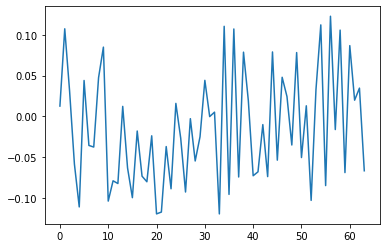

Epoch 100: 
 Train Loss: 1.0642558336257935 
 Test Loss: 1.056490421295166


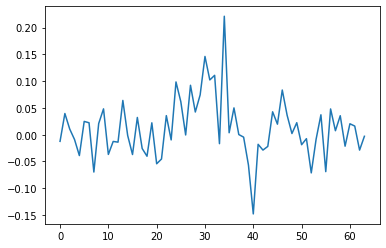

Epoch 200: 
 Train Loss: 0.7417499423027039 
 Test Loss: 0.7381392121315002


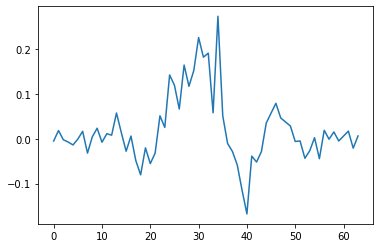

Epoch 300: 
 Train Loss: 0.6433637738227844 
 Test Loss: 0.6409614682197571


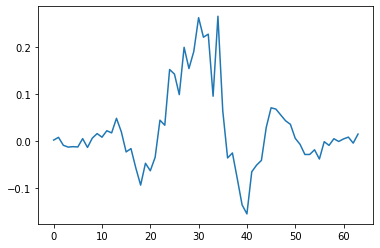

Epoch 400: 
 Train Loss: 0.5878524780273438 
 Test Loss: 0.5860502123832703


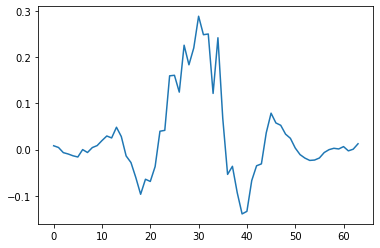

Epoch 500: 
 Train Loss: 0.5464591383934021 
 Test Loss: 0.5450760126113892


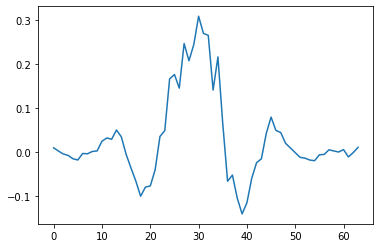

Epoch 600: 
 Train Loss: 0.5138942003250122 
 Test Loss: 0.5128452181816101


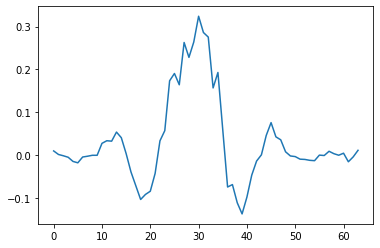

Epoch 700: 
 Train Loss: 0.4882000684738159 
 Test Loss: 0.4874318242073059


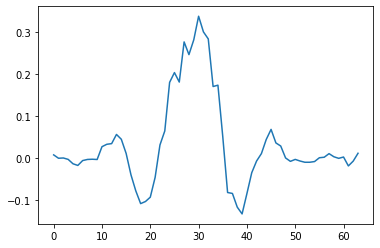

Epoch 800: 
 Train Loss: 0.46756282448768616 
 Test Loss: 0.46703776717185974


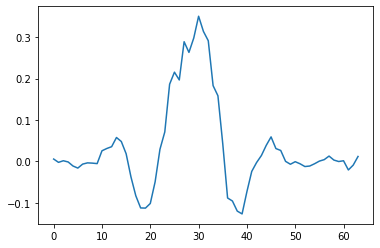

Epoch 900: 
 Train Loss: 0.4503953158855438 
 Test Loss: 0.45009011030197144


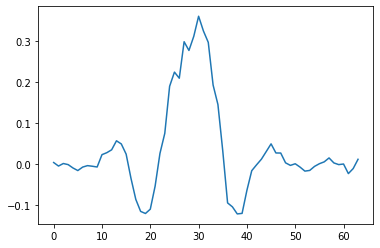

Epoch 1000: 
 Train Loss: 0.43568354845046997 
 Test Loss: 0.4355819821357727


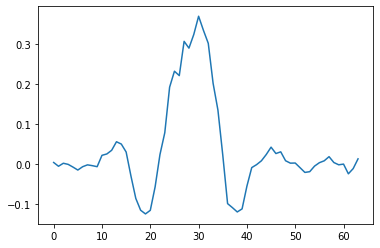

Epoch 1100: 
 Train Loss: 0.4228360950946808 
 Test Loss: 0.4229249656200409


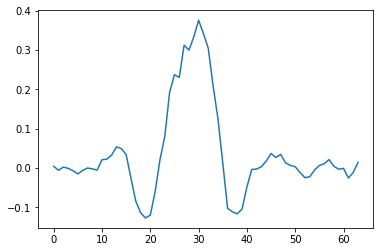

Epoch 1200: 
 Train Loss: 0.4114803969860077 
 Test Loss: 0.41174715757369995


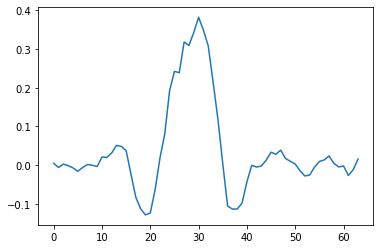

Epoch 1300: 
 Train Loss: 0.40135616064071655 
 Test Loss: 0.4017888307571411


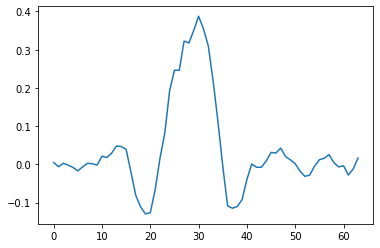

Epoch 1400: 
 Train Loss: 0.3922688663005829 
 Test Loss: 0.39285609126091003


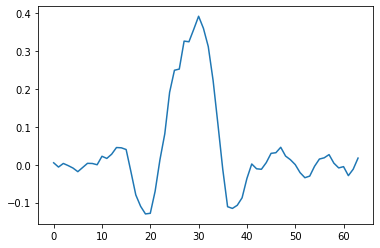

Epoch 1500: 
 Train Loss: 0.38406679034233093 
 Test Loss: 0.3847975730895996


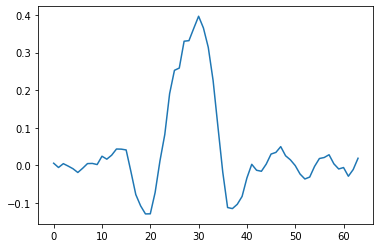

Epoch 1600: 
 Train Loss: 0.3766286373138428 
 Test Loss: 0.37749311327934265


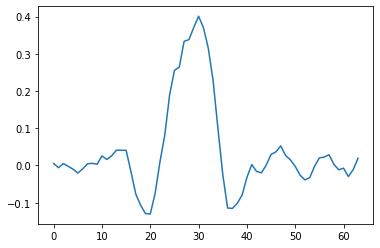

Epoch 1700: 
 Train Loss: 0.36985570192337036 
 Test Loss: 0.37084507942199707


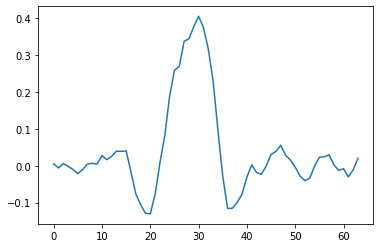

Epoch 1800: 
 Train Loss: 0.36366623640060425 
 Test Loss: 0.36477240920066833


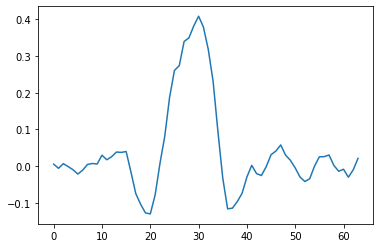

Epoch 1900: 
 Train Loss: 0.35799211263656616 
 Test Loss: 0.3592078387737274


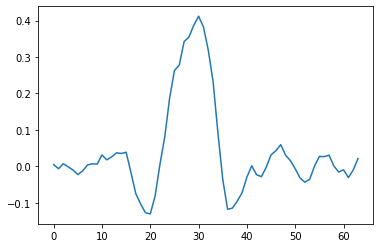

Epoch 2000: 
 Train Loss: 0.3527758717536926 
 Test Loss: 0.35409456491470337


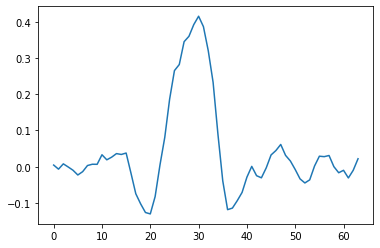

Epoch 2100: 
 Train Loss: 0.34796828031539917 
 Test Loss: 0.3493846356868744


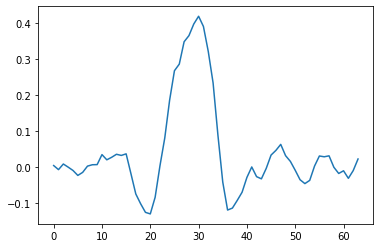

Epoch 2200: 
 Train Loss: 0.34352731704711914 
 Test Loss: 0.3450375497341156


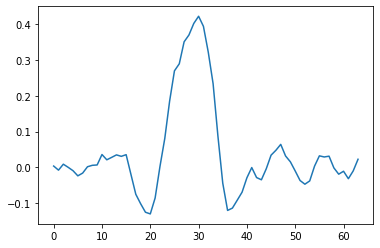

Epoch 2300: 
 Train Loss: 0.3394167125225067 
 Test Loss: 0.3410145342350006


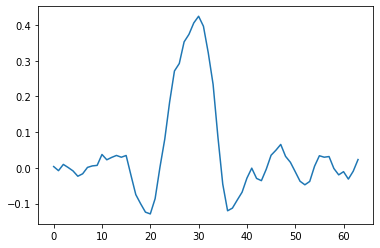

Epoch 2400: 
 Train Loss: 0.335605263710022 
 Test Loss: 0.3372851312160492


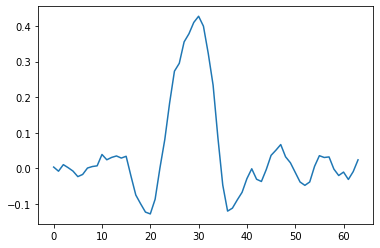

Epoch 2500: 
 Train Loss: 0.3320649266242981 
 Test Loss: 0.3338283598423004


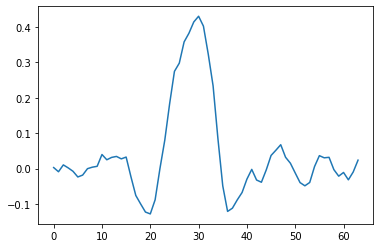

Epoch 2600: 
 Train Loss: 0.3287716507911682 
 Test Loss: 0.3306134343147278


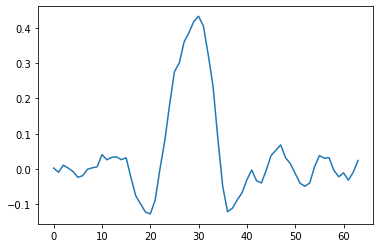

Epoch 2700: 
 Train Loss: 0.325704425573349 
 Test Loss: 0.3276211619377136


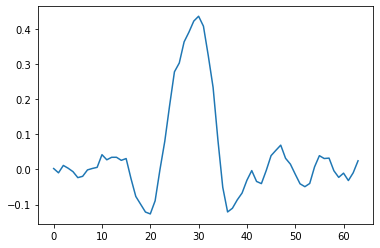

Epoch 2800: 
 Train Loss: 0.32284417748451233 
 Test Loss: 0.3248346745967865


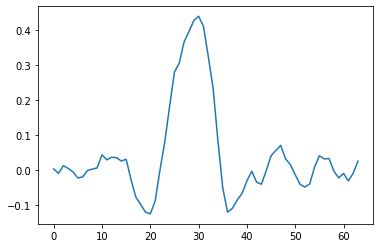

Epoch 2900: 
 Train Loss: 0.3201741576194763 
 Test Loss: 0.32223501801490784


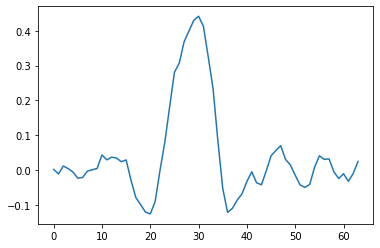

Epoch 3000: 
 Train Loss: 0.31767934560775757 
 Test Loss: 0.3198097050189972


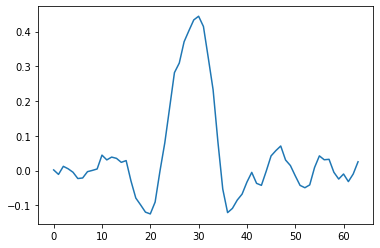

Epoch 3100: 
 Train Loss: 0.31534650921821594 
 Test Loss: 0.3175419867038727


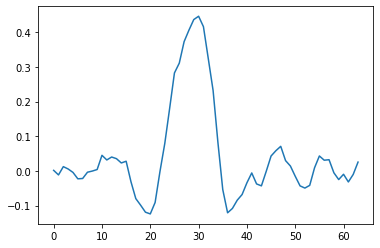

Epoch 3200: 
 Train Loss: 0.31316348910331726 
 Test Loss: 0.3154263198375702


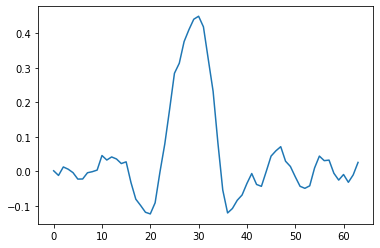

Epoch 3300: 
 Train Loss: 0.3111194372177124 
 Test Loss: 0.3134460151195526


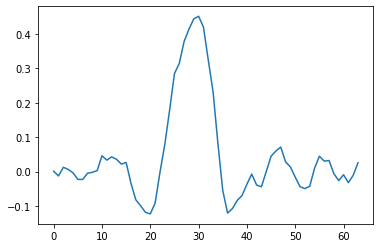

Epoch 3400: 
 Train Loss: 0.30920469760894775 
 Test Loss: 0.3115924894809723


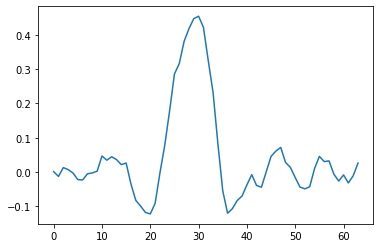

Epoch 3500: 
 Train Loss: 0.3074102997779846 
 Test Loss: 0.3098604679107666


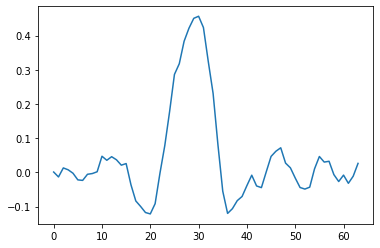

Epoch 3600: 
 Train Loss: 0.3057281970977783 
 Test Loss: 0.3082381784915924


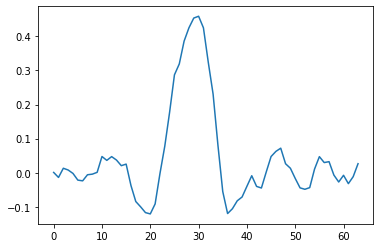

Epoch 3700: 
 Train Loss: 0.30415108799934387 
 Test Loss: 0.3067193925380707


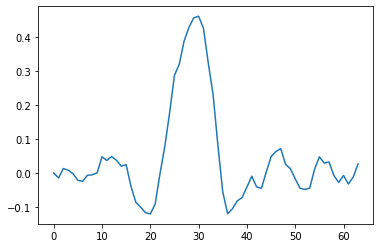

Epoch 3800: 
 Train Loss: 0.3026721179485321 
 Test Loss: 0.30529820919036865


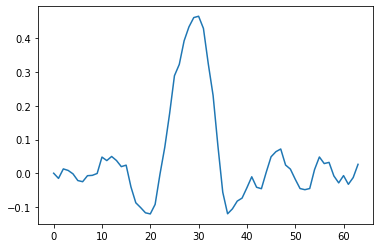

Epoch 3900: 
 Train Loss: 0.3012852668762207 
 Test Loss: 0.30396804213523865


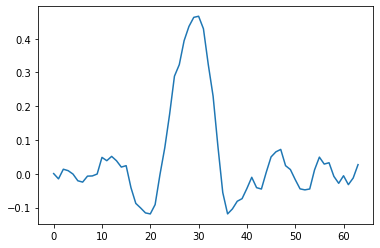

Epoch 4000: 
 Train Loss: 0.29998481273651123 
 Test Loss: 0.30272263288497925


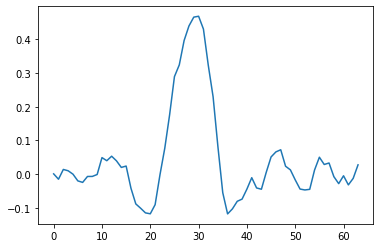

Epoch 4100: 
 Train Loss: 0.2987655997276306 
 Test Loss: 0.3015584945678711


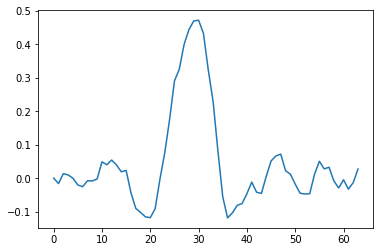

Epoch 4200: 
 Train Loss: 0.29762282967567444 
 Test Loss: 0.30046942830085754


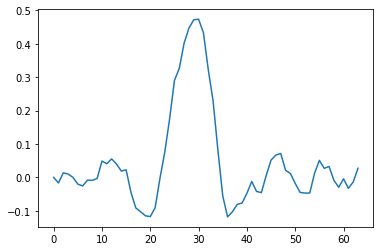

Epoch 4300: 
 Train Loss: 0.2965518534183502 
 Test Loss: 0.2994522154331207


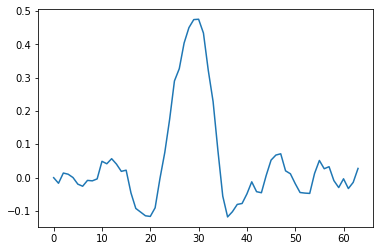

KeyboardInterrupt: 

In [4]:
# Backprop Training

testcosts, traincosts = train_loop(model=NN.to('cuda'), optimizer=optimizer, cost=criterion, Xtrain=Xtrain, ytrain=ytrain, 
                                   Xtest=Xtest, ytest=ytest, epochs=10000, eval=True, plot_iteration=100, 
                                   use_cuda=True)

In [7]:
# Evaluate

NN.to('cpu')
symbol_set = [3, 1, -1, -3] # all symbols that we use
num_symbols = 100000
symbol_seq = np.random.choice(symbol_set, num_symbols, replace=True)
m = 8
CS = Comms_System(symbol_set=symbol_set, symbol_seq=symbol_seq, num_samples=m, beta=0.35)
SNR = 10
# can never not normalize and not use gain. Either one or both.

euclid_decisions = CS.transmission(SNRdb=SNR, mode='euclidean')
receiver_net_decisions = CS.transmission(SNRdb=SNR, mode='network', model=NN, rx_lowpass=False)


print("Accuracy:", 1 - CS.evaluate(euclid_decisions)[1])
print("Accuracy:", 1 - CS.evaluate(receiver_net_decisions)[1])

Accuracy: 0.88198
Accuracy: 0.88065


In [15]:
SNRdbs, euclid_er, network_er, NN_er, block_er, joint_er,  error_theory = \
SNR_plot(num_symbols=10000, norm_nets=True, cutoff=2, all_components=False, rx_model=NN, rx_low=False)

Avg symbol energy 5.0056
gain 7.9976510763715565


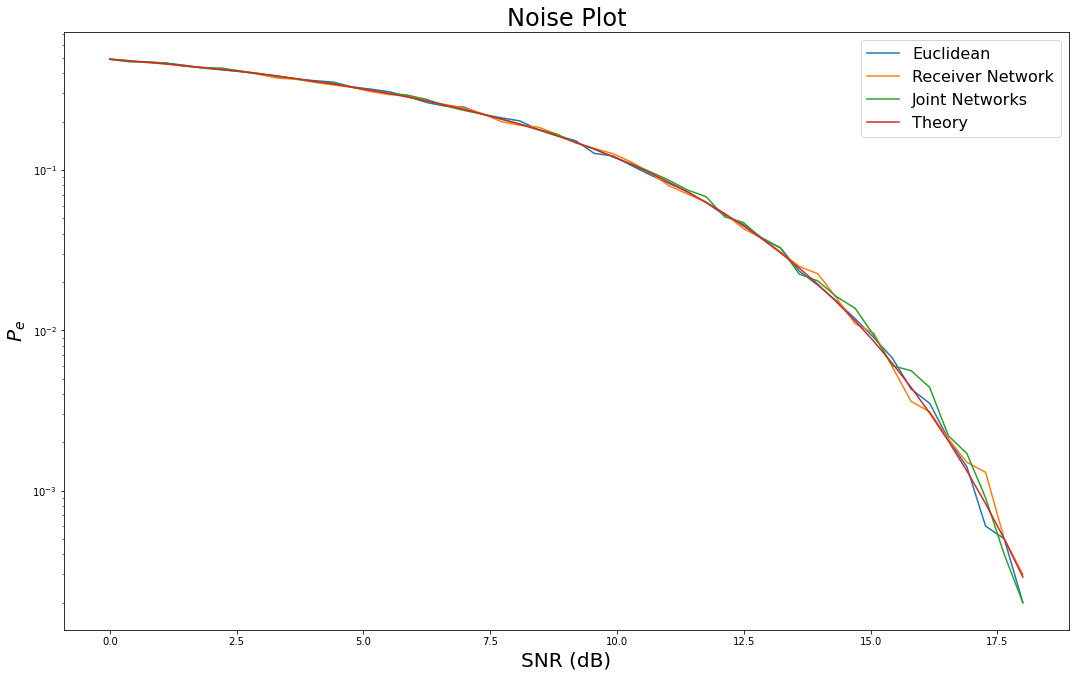

In [16]:
plt.figure(figsize=(18,11))
plt.title('Noise Plot', fontsize=24)
plt.xlabel('SNR (dB)', fontsize=20)
plt.ylabel('$P_e$', fontsize=20)
num = 0
plt.semilogy(SNRdbs[num:], euclid_er[num:])
#plt.semilogy(SNRdbs[num:], NN_er[num:])
#plt.semilogy(SNRdbs[num:], block_er[num:])
plt.semilogy(SNRdbs[num:], network_er[num:])
plt.semilogy(SNRdbs[num:], joint_er[num:], alpha=1)
plt.semilogy(SNRdbs[num:], error_theory[num:], alpha=1)
legend0 = ['Receiver Network', 'Theory']
legend1 = ['Euclidean', 'Receiver Network', 'Joint Networks', 'Theory']
legend2 = ['Euclidean', 'NN Dec Maker', 'Block', 'Receiver Network', 'Joint Networks', 'Theory']
plt.legend(legend1, fontsize=16)
plt.show()